# Predicting Breast Cancer

### Import Packages

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

### Load the Breast Cancer Data Set

In [3]:
# Load the breast cancer data set
df = datasets.load_breast_cancer()
X, y = df.data, df.target


### Split Data into Training and Testing Data

In [4]:
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15, stratify=y)


### Create Model Pipeline

In [5]:
# Create the estimator - pipeline
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=245))


### Fit Model

In [8]:
# Fit the Model
#
pipeline.fit(X_train,y_train)
probs = pipeline.predict_proba(X_test)
FPrate, TPrate, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc = auc(FPrate, TPrate)
roc_auc

0.994304906542056

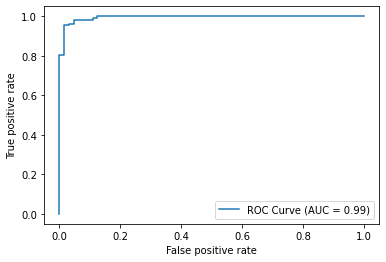

In [9]:
plt.plot(FPrate, TPrate, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()


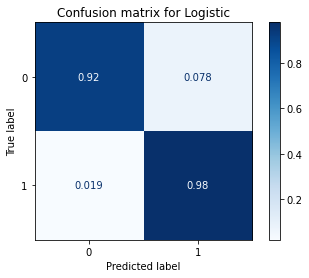

Model Accuracy: 0.9590643274853801
Model AUC ROC: 0.9515917056074766


In [10]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(pipeline, X_test, y_test,
                               cmap=plt.cm.Blues, 
                               normalize='true')
plt.title('Confusion matrix for Logistic')
plt.show(matrix)
plt.show()

predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Model Accuracy: {accuracy}')

roc = roc_auc_score(y_test, predictions)

print(f'Model AUC ROC: {roc}')

